# Insights on the Profitability of Movies from the Year 1920 to 2020

#### Author:Rose Kyalo

![Movie Analysis](/visualizations/readme_image.webp)


## Overview
We will be utilizing "The Numbers Movie Budget" dataset from The Numbers website, which is in CSV format. Our objective is to analyze the data using the Pandas DataFrame to assist our company X in determining the types of films that are currently thriving and suitable for producing in their studio.

To achieve this, we will address the following key questions:

1. What types of movies are currently performing exceptionally well in terms of popularity and profitability?

2. How has the profitability of movie production evolved over time, from 1920 to 2020?

3. Does the production budget significantly influence the overall profit of movies?

By answering these questions, we aim to provide valuable insights to our company X, enabling them to make informed decisions and strategize their movie production endeavors effectively.

In [1]:
# Import the neccessary modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data. 
df = pd.read_csv("C:/Users/user/Documents/Project/Project-1/data/tn.movie_budgets.csv")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Dataframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# Checking for null values in the dataset.
df.isnull().value_counts()

id     release_date  movie  production_budget  domestic_gross  worldwide_gross
False  False         False  False              False           False              5782
dtype: int64

In [5]:
#Checking for duplicates in the dataset.
df.duplicated().value_counts()

False    5782
dtype: int64

## Data Understanding

The dataframe we are working with comprises 5782 rows and 6 columns.The columns are as follows:

1. id - Unique identifier for each movie.

2. release_date - Date of movie release.

3. movie - Name of the movie.

4. production_budget - Production budget of the movie.

5. domestic_gross - Domestic gross revenue of the movie.

6. worldwide_gross - Worldwide gross revenue of the movie.

We are pleased to note that there are no missing values and duplicates in any of the columns. The dataset includes two data types: int64 and object. To facilitate our analysis, we will need to convert the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to integer data types, allowing us to perform numerical computations efficiently. Additionally, we intend to convert the 'release_date' column to datetime type to enable accurate temporal analysis and date-based calculations. With these data type transformations, we can conduct comprehensive and meaningful analyses on the movie dataset.

We will convert 'production_budget', 'domestic_gross', and 'worldwide_gross', into integer types.We do so by removing the currency symbols and commas from the values.

In [6]:
# Strip the dollar sign and comma from 'production_budget' column and convert to integer.
df.production_budget = df.production_budget.map(lambda x: x.replace("$", "").replace(",", "")).astype(int)

In [7]:
# Strip the dollar sign and comma from 'domestic_gross' column and convert to integer.
df.domestic_gross = df.domestic_gross.map(lambda x: x.replace("$", "").replace(",", "")).astype(int)

In [8]:
# Strip the dollar sign and comma from 'worldwide_gross' column and convert to integer.
df.worldwide_gross = df.worldwide_gross.map(lambda x: x.replace("$", "").replace(",", "")).astype(float)

Due to the large values present in the 'worldwide_gross' column, it was necessary to convert this column to a float data type, as the integer data type could not accommodate such extensive figures. By converting it to a float, we can retain the precision and integrity of the data, ensuring that no information is lost during the transformation process. This allows us to perform accurate calculations and analyses involving the 'worldwide_gross' values, despite their significant magnitude.

In [9]:
# Checking the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int32  
 4   domestic_gross     5782 non-null   int32  
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 226.0+ KB


Now that our data is polished and gleaming, we are excited to explore it and find answers to our questions.Get ready for an engaging exploration as we dive into the depths of our data, ready to unveil its secrets!

In [10]:
# Calculate the domestic net profit for each movie.
df = df.eval("domestic_net_profit = domestic_gross - production_budget")

In [11]:
# Calculate the worldwide_gross net profit for each movie.
df = df.eval("worldwide_net_profit = worldwide_gross - production_budget")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net_profit,worldwide_net_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,-169536125,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-307237650,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,128405868,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,303181382,9.997217e+08


In [12]:
#Checking exploratory analysis. 
df.describe()

,id,production_budget,domestic_gross,worldwide_gross,domestic_net_profit,worldwide_net_profit
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.028557e+07,5.989970e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,4.992137e+07,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-3.072376e+08,-2.002376e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-9.132757e+06,-2.189071e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,-3.487755e+05,8.550286e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.778144e+07,6.096850e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,6.306622e+08,2.351345e+09


Production Budget: The average production budget for the movies in the dataset is approximately 50.37 million dollars, with a minimum of 1 million dollars and a maximum of 100 million dollars. The standard deviation is around 28.82 million dollars, indicating significant variability in production budgets.

Domestic and Worldwide Gross: The average domestic gross revenue is approximately 31.59 million dollars, and the average worldwide gross revenue is around 41.87 million dollars. Both domestic and worldwide gross revenues have a wide range, with the maximum values reaching as high as 425 million dollars and 936 million dollars, respectively.

Domestic and Worldwide Net Profit: The average domestic net profit is approximately 10.29 million dollars, and the average worldwide net profit is about 59.90 million dollars. The standard deviation is relatively high for both net profits, indicating varying levels of profitability among the movies.

Negative Net Profit: It's interesting to note that some movies in the dataset have negative net profits, both domestically and worldwide, indicating that they didn't make enough revenue to cover their production budget.

## Question 1: What types of movies are currently doing the best?

To gain insights into the profitability of movies, we will analyze their financial performance in both domestic and worldwide markets. By examining the data, we can identify movies that achieved profitability solely in their domestic markets, those that succeeded in the global market, and those that managed to generate profits in both regions. This analysis will provide a comprehensive understanding of how movies performed in different markets and their overall financial success on a global scale.

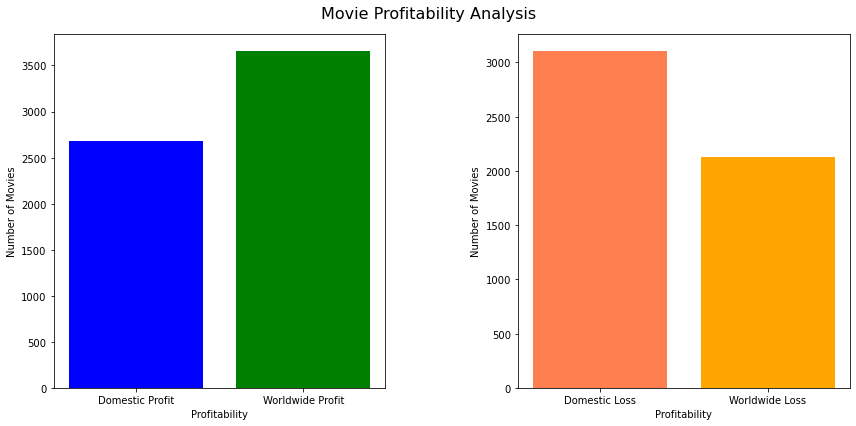

In [13]:
# List of movies that did not make a domestic profit.
movies_domestically_loss = df[df['domestic_net_profit'] <= 0]['movie']
num_movies_domestically_loss = len(movies_domestically_loss)

# List of movies that did not make a worldwide profit.
movies_worldwide_loss = df[df['worldwide_net_profit'] <= 0]['movie']
num_movies_worldwide_loss = len(movies_worldwide_loss)

# List of movies that made a domestic profit.
movies_domestically_profit = df[df['domestic_net_profit'] > 0]['movie']
num_movies_domestically_profit = len(movies_domestically_profit)

# List of movies that made a worldwide profit.
movies_worldwide_profit = df[df['worldwide_net_profit'] > 0]['movie']
num_movies_worldwide_profit = len(movies_worldwide_profit)

# Visualize the results.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 6))

# Data for the first subplot.
profit_labels1 = ["Domestic Profit","Worldwide Profit"]
profit_values1 = [num_movies_domestically_profit,num_movies_worldwide_profit]

# Data for the second subplot.
profit_labels2 = ["Domestic Loss", "Worldwide Loss"]
profit_values2 = [num_movies_domestically_loss, num_movies_worldwide_loss]

# Plotting the first subplot.
ax1.bar(profit_labels1, profit_values1,color=("blue","green"))
ax1.set_xlabel('Profitability')
ax1.set_ylabel('Number of Movies')

# Plotting the first subplot.
ax2.bar(profit_labels2, profit_values2,color=("coral","orange"))
ax2.set_xlabel('Profitability')
ax2.set_ylabel('Number of Movies')

# Set the main title at the center of the two subplots
fig.suptitle('Movie Profitability Analysis', ha="center", fontsize=16)

# Adjust the layout to avoid overlapping labels.
plt.tight_layout()

#Changing amount of whitespace between the subplots
plt.subplots_adjust(wspace = 0.4)

# Show the plot.
plt.show()


The majority of movies in our dataset have managed to generate a profit on a global scale. This positive outcome suggests that our production strategy should focus on creating films with broad international appeal. In the next phase of our investigation, we will delve deeper into the specifics and identify some of the highly profitable movies that have succeeded in captivating a global audience. By gaining insights from these successful examples, we can refine our approach to producing movies that resonate with audiences worldwide.

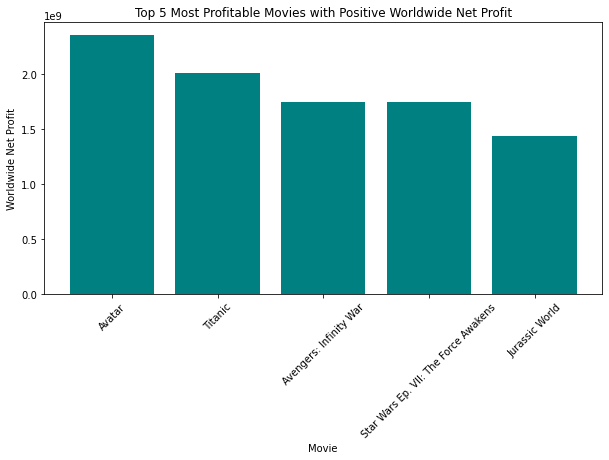

In [14]:
# Dataframe with movies that made a profit worldwide.
movies_worldwide_profit_df = df[df['worldwide_net_profit'] > 0]

# Select top N rows.
N = 5

top_profitable_movies_df = movies_worldwide_profit_df.sort_values(by='worldwide_net_profit', ascending=False)
top_five_profitable_movies_df = top_profitable_movies_df.head(N)

# Plot the chart.
plt.figure(figsize = (10,5))

plt.bar(top_five_profitable_movies_df["movie"],top_five_profitable_movies_df["worldwide_net_profit"],color ="teal")

# Set x,y and xtick labels.
plt.xticks(rotation = 45)
plt.xlabel("Movie")
plt.ylabel("Worldwide Net Profit")
plt.title(f"Top {N} Most Profitable Movies with Positive Worldwide Net Profit")

# Show the chart.
plt.show()

The top five movies that successfully captivated a global audience are as follows:

1.Avatar

2.Titanic

3.Avengers: Infinity War

4.Star Wars Ep. VII: The Force Awakens

5.Jurassic World

Now, let's further analyze the movies that achieved profitability both domestically and worldwide. This analysis will help us identify the movies that not only garnered international attention but also performed well within their home country.

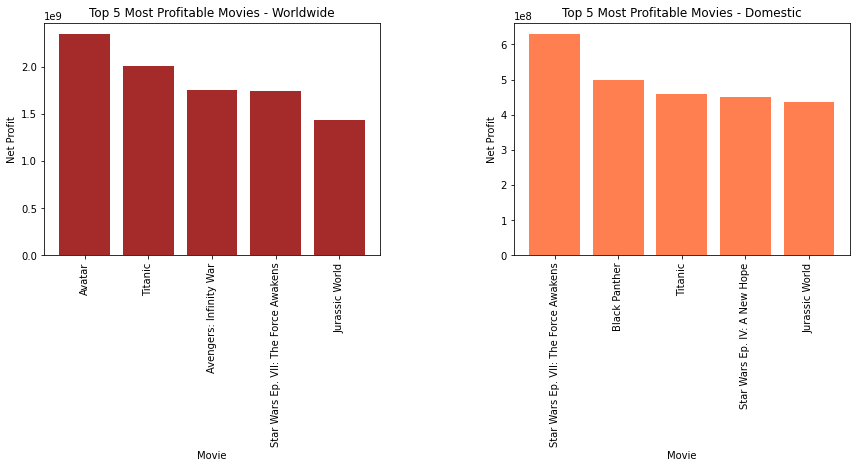

In [15]:
# Dataframe with profitable movies both domestically and worldwide.
movies_profitable_df = df[(df['domestic_net_profit'] > 0) & (df['worldwide_net_profit'] > 0)]
N = 5

# Sort the DataFrame by 'worldwide_net_profit' column in descending order.
top_movies_worldwide_df = movies_profitable_df.sort_values(by='worldwide_net_profit', ascending=False)
top_movies_domestic_df = movies_profitable_df.sort_values(by='domestic_net_profit', ascending=False)

# Select the top N rows.
top_movies_worldwide_df = top_movies_worldwide_df.head(N)
top_movies_domestic_df = top_movies_domestic_df.head(N)

# Create the bar chart.
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.bar(top_movies_worldwide_df['movie'], top_movies_worldwide_df['worldwide_net_profit'],color = "brown")
ax2.bar(top_movies_domestic_df['movie'],top_movies_domestic_df['domestic_net_profit'],color = "coral")

# Label the charts.
ax1.set_xticks(range(N))
ax1.set_xticklabels(top_movies_worldwide_df['movie'],rotation=90)
ax1.set_xlabel('Movie')
ax1.set_ylabel('Net Profit')
ax1.set_title(f'Top {N} Most Profitable Movies - Worldwide')

ax2.set_xticks(range(N))
ax2.set_xticklabels(top_movies_domestic_df['movie'],rotation=90)
ax2.set_xlabel('Movie')
ax2.set_ylabel('Net Profit')
ax2.set_title(f'Top {N} Most Profitable Movies - Domestic')

# Adjust the layout to avoid overlapping labels.
plt.tight_layout()

#Changing amount of whitespace between the subplots
plt.subplots_adjust(wspace = 0.4,bottom = 0.4)

# Show the plot.
plt.show()


Based on the visualization, it is evident that movies like Titanic, Jurassic World, and Star Wars Ep.VII: The Force Awakens have emerged as the top-performing movies in terms of profitability, both domestically and worldwide. These movies serve as strong examples of successful ventures that we highly recommend for our company X. Their outstanding performance in generating profits makes them ideal choices for potential investments or collaborations.

## Question 2: What is the profitability of movie production over time?

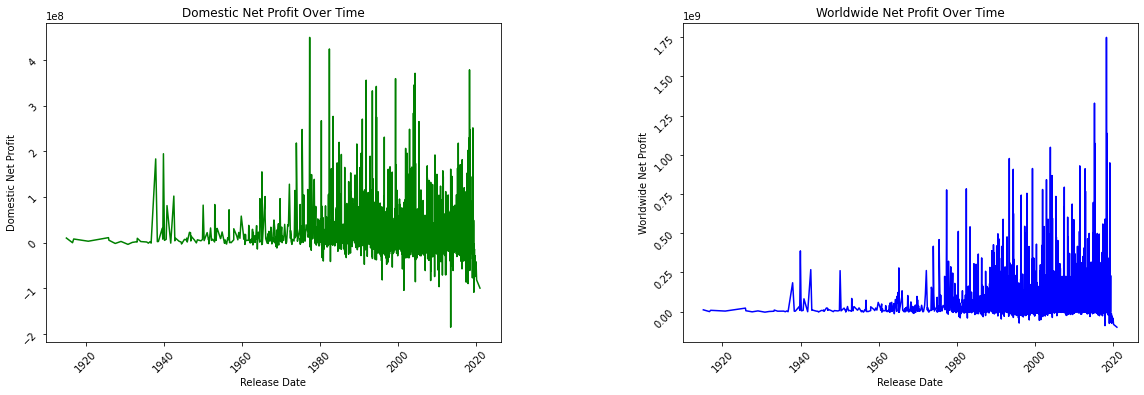

In [16]:
# Convert the release_date column to a datetime data type.
df["release_date"] = pd.to_datetime(df["release_date"])

# Group the data by release date and calculate the mean net profit for each date.
profit_by_release_date = df.groupby("release_date").mean().reset_index()

# Create subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8),facecolor="white")

# Plot domestic net profit over time.
ax1.plot(profit_by_release_date["release_date"], profit_by_release_date["domestic_net_profit"],color = "green")
ax1.set_xlabel("Release Date")
ax1.set_ylabel("Domestic Net Profit")
ax1.set_title("Domestic Net Profit Over Time")
ax1.tick_params(rotation=45)

# Plot worldwide net profit over time.
ax2.plot(profit_by_release_date["release_date"], profit_by_release_date["worldwide_net_profit"],color = "blue")
ax2.set_xlabel("Release Date")
ax2.set_ylabel("Worldwide Net Profit")
ax2.set_title("Worldwide Net Profit Over Time")
ax2.tick_params(rotation=45)

# Adjust the layout to avoid overlapping labels.
plt.tight_layout()

#Changing amount of whitespace between the subplots
plt.subplots_adjust(wspace = 0.4,bottom = 0.4)

# Show the plot.
plt.show()

In [17]:
# Convert the 'release_date' column to datetime format.
df.release_date = pd.to_datetime(df.release_date).dt.strftime("%m-%d-%Y")

# Extract all release dates into a list.
release_dates = [i for i in df.release_date]

# Find the latest release date.
latest_release_date = max(release_dates)

print(f"The latest movie in our dataset was released on {latest_release_date}.")

The latest movie in our dataset was released on 12-31-2020.


The movie industry has been producing films since 1920, and it continues to thrive up to the present day, with the latest movie released on December 31, 2020. Over the years, there has been a noticeable upward trend in both domestic and worldwide profits, particularly up to the 1950s.However, in recent times, there have been instances where certain movies failed to generate a profit. Despite these occasional setbacks, the movie industry, on the whole, has shown remarkable consistency in its profitability over the years, indicating a strong and enduring success in the entertainment market.'

# Question 3: Does the production budget has an effect on the profit?

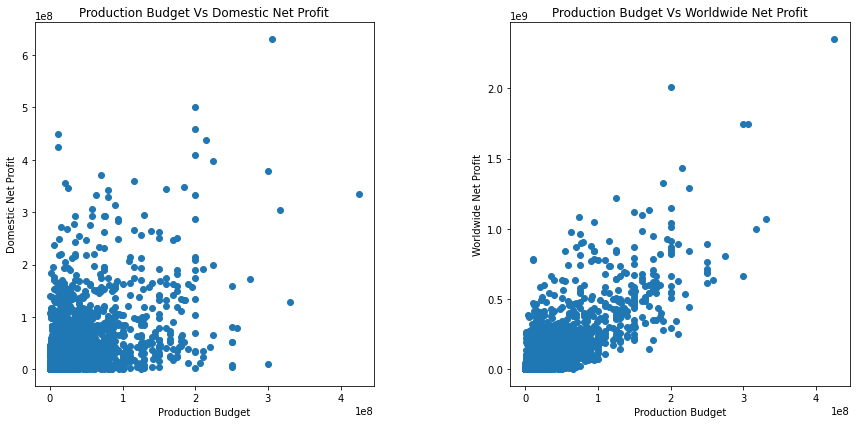

In [18]:
# Create subplots for scatter plots.
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,6))

movies_domestically_profit_df = df[df['domestic_net_profit'] > 0]

# Plot the scatter plots.
ax1.scatter(movies_domestically_profit_df["production_budget"],movies_domestically_profit_df["domestic_net_profit"])
ax2.scatter(movies_domestically_profit_df["production_budget"],movies_domestically_profit_df["worldwide_net_profit"])

# Set axis labels and titles.
ax1.set_xlabel("Production Budget")
ax1.set_ylabel("Domestic Net Profit")
ax1.set_title("Production Budget Vs Domestic Net Profit")

ax2.set_xlabel("Production Budget")
ax2.set_ylabel("Worldwide Net Profit")
ax2.set_title("Production Budget Vs Worldwide Net Profit")


# Adjust layout for better visualization.
plt.tight_layout()

#Changing amount of whitespace between the subplots
plt.subplots_adjust(wspace = 0.4)

#Show plot.
plt.show()

The scatter plot provides clear evidence of a positive relationship between the production budget and net profit, both domestically and worldwide. As the production budget increases, there is a noticeable upward trend in both domestic and worldwide net profits. This suggests that higher investments in movie production have a direct impact on the financial success of the movies, leading to higher returns both in the domestic market and on a global scale.

In [19]:
# Correlation coeffienct for 'production_budget' and 'domestic_net_profit'.
correlation_domestic = movies_profitable_df["production_budget"].corr(movies_profitable_df["domestic_net_profit"])
correlation_domestic

0.4555144510725651

In [20]:
# Correlation coeffienct for 'production_budget' and 'worldwide_net_profit'.
correlation_worldwide = movies_profitable_df["production_budget"].corr(movies_profitable_df["worldwide_net_profit"])
correlation_worldwide

0.7727206453311145

The analysis reveals that there is a moderate positive correlation (correlation coefficient = 0.4) between the production budget and domestic net profit, indicating that as the production budget increases, the domestic net profit also tends to increase.

Furthermore, there is a strong correlation (correlation coefficient = 0.7) between the production budget and worldwide profit, suggesting that a higher production budget is often associated with higher worldwide profits. In other words, as the budget for a movie increases, it has a greater potential to generate higher profits on a global scale.

# Conclusion

Our analysis revealed valuable insights into the movie industry from 1920 to 2020. Most movies achieved international profitability, emphasizing the importance of global appeal in our production strategy. Movies like Avatar, Titanic, Avengers: Infinity War, Star Wars Ep. VII: The Force Awakens, and Jurassic World serve as excellent examples for our international-focused approach.

Additionally, certain movies, such as Titanic, Jurassic World, and Star Wars Ep.VII: The Force Awakens, succeeded in both domestic and international markets, guiding us when targeting the domestic audience.

The movie industry has shown consistent growth since 1920, indicating a resilient and captivating market that presents exciting opportunities for our company.

Furthermore, our analysis demonstrated a strong correlation between production budget and movie profitability, highlighting the significance of strategic financial planning and investment.

Overall, by prioritizing global appeal, learning from successful movies, and strategic budget allocation, we can position ourselves for success in this dynamic and thriving industry.